In [1]:
#%%
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import textwrap                                                 # need this to make the long title

csvConed = "DataFiles/GasHistory_2010_ReportFrequency_Monthly.csv"
csvFDNY  = "DataFiles/FDNY/Geoid_Count2018.csv"#"DataFiles/FDNY/FDNY2018.csv"
conedMonthlyDF  = pd.read_csv(csvConed)  

csvHeader = ['Geoid', 'MonthYear_ConEd', 'NumberOfReports_ConEd', 'CountyName', 'CensusTract', "Month"] 
csvSeasonalHeader = ['Geoid', 'Winter_ReportCount_ConEd',"Winter_ReportCount_NYFD", 'CountyName', 'CensusTract']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
winterMonths = [12,1,2]

monthlyDF = pd.DataFrame()
for col in range(0, len(csvHeader)):
    monthlyDF[csvHeader[col]] = str
seasonalDF = pd.DataFrame()
for col in range(0, len(csvSeasonalHeader)):
    seasonalDF[csvSeasonalHeader[col]] = str

MIN_NUM_TRACTS_NEEDED_TO_PRINT = 140
coned_CENSUS_TRACT_COL = "CensusTract_2010"
coned_TOTAL_REPORT     = "TotalReports"
coned_COUNTY_NAME      = "CountyName_2010"
coned_GEOID            = "GEOID_SCT"

# CONEDISON: POPULATING COLUMNS FOR CON EDISON AND OTHERS: Need to do this to seperate usable months that got enough data in my conedison monthly csv 
skipMonthIndex = []
conedMonthList = list()
for row in range(0,len(conedMonthlyDF)):
    if row in skipMonthIndex:
        continue
    # SAME MONTH SEPERATION:
    thisMonthsDF = conedMonthlyDF.loc[                                                                               
        (conedMonthlyDF['MonthYear']  == conedMonthlyDF['MonthYear'][row])
    ]  
    if (len(thisMonthsDF) <= MIN_NUM_TRACTS_NEEDED_TO_PRINT) or (thisMonthsDF.iloc[0]["Month"] not in winterMonths):                                                                                 
        continue
    skipMonthIndex.extend(thisMonthsDF.index.tolist())
    thisMonthsDF = thisMonthsDF.reset_index(drop=True)
    thisMonthYrStr = conedMonthlyDF['MonthYear'][row]  
    thisMonths_vsDF = pd.DataFrame(columns=csvHeader)  
    for row in range(0,len(thisMonthsDF)): 
        tempDF = pd.DataFrame(columns=csvHeader)  
        tempDF.at[0,"MonthYear_ConEd"]       = thisMonthsDF.iloc[row]["MonthYear"]
        tempDF.at[0,"Geoid"]                 = int(thisMonthsDF.iloc[row][coned_GEOID])
        tempDF.at[0,"NumberOfReports_ConEd"] = thisMonthsDF.iloc[row][coned_TOTAL_REPORT]
        tempDF.at[0,"CountyName"]            = thisMonthsDF.iloc[row][coned_COUNTY_NAME]
        tempDF.at[0,"CensusTract"]           = thisMonthsDF.iloc[row][coned_CENSUS_TRACT_COL]
        tempDF.at[0,"Month"]                 = int(thisMonthsDF.iloc[row]["Month"])
        thisMonths_vsDF = pd.concat([thisMonths_vsDF,tempDF],sort=True)
    thisMonths_vsDF = thisMonths_vsDF.reset_index(drop=True)     

    monthlyDF = pd.concat([monthlyDF,thisMonths_vsDF], sort=True)
monthlyDF = monthlyDF.reset_index(drop=True)    
monthlyDF[['Geoid', 'Month', 'CensusTract', 'NumberOfReports_ConEd']] = monthlyDF[['Geoid', 'Month', 'CensusTract', 'NumberOfReports_ConEd']].apply(pd.to_numeric) 
# print(monthlyDF)


skipGEOIDIndex = []
for row in range(0,len(monthlyDF)):
    if row in skipGEOIDIndex:
        continue
    # SAME GEOID SEPERATION:
    thisGeoid = monthlyDF.loc[                                                                               
        (monthlyDF["Geoid"]  == monthlyDF["Geoid"][row])
    ]  
    skipGEOIDIndex.extend(thisGeoid.index.tolist())
    thisGeoid = thisGeoid.reset_index(drop=True)
    tempDF = pd.DataFrame(columns=csvHeader)  
    tempDF.at[0,"Geoid"]              = thisGeoid.iloc[0]["Geoid"]
    tempDF.at[0,"Winter_ReportCount_ConEd"] = int(thisGeoid.NumberOfReports_ConEd.sum())
    tempDF.at[0,"CountyName"]         = thisGeoid.iloc[0]["CountyName"]
    tempDF.at[0,"CensusTract"]        = thisGeoid.iloc[0]["CensusTract"]

    seasonalDF = pd.concat([seasonalDF,tempDF],sort=True)
seasonalDF = seasonalDF.reset_index(drop=True)     
seasonalDF =seasonalDF.filter(csvSeasonalHeader)

conEd_WinterGEOIDList = list(seasonalDF.Geoid.values)

########################################### Xue's data ########################################
csvfile_NYFD = 'DataFiles/FDNY/Geoid_Count2018.csv'
data = pd.read_csv(csvfile_NYFD)

Season = [['03','04','05'],['06','07','08'],['09','10','11'],['12','01','02']]
Season_word = ['Spring','Summer','Autumn','Winter']
Month_data = pd.DataFrame(columns = ['Geoid','Spring','Summer','Autumn','Winter']) # create a new Dataframe with each month
info = np.array(['36005046201','36047091000']) 
Spring_Count = np.array([0,0])
Summer_Count = np.array([0,0])
Autumn_Count = np.array([0,0])
Winter_Count = np.array([0,0])

for row in range(0,len(data)): 
    detail = str(data.iat[row,1])
    if detail in info:                          # if the string already exist, we will just increment the count
        itemindex = np.where(info == detail)
    else:                                       # else we will have to add the string to info array and create an extra count
        info = np.append(info,detail)
        Spring_Count = np.append(Spring_Count,0)
        Summer_Count = np.append(Summer_Count,0)
        Autumn_Count = np.append(Autumn_Count,0)
        Winter_Count = np.append(Winter_Count,0)
        itemindex = np.where(info == detail)
        
    if data.iat[row,0][0:2] == '03' or data.iat[row,0][0:2] == '04' or data.iat[row,0][0:2] == '05':
        Spring_Count[itemindex[0][0]] += data.iat[row,2]
    elif data.iat[row,0][0:2] == '06' or data.iat[row,0][0:2] == '07' or data.iat[row,0][0:2] == '08':
        Summer_Count[itemindex[0][0]] += data.iat[row,2]
    elif data.iat[row,0][0:2] == '09' or data.iat[row,0][0:2] == '10' or data.iat[row,0][0:2] == '11':
        Autumn_Count[itemindex[0][0]] += data.iat[row,2]
    elif data.iat[row,0][0:2] == '12' or data.iat[row,0][0:2] == '01' or data.iat[row,0][0:2] == '02':
        Winter_Count[itemindex[0][0]] += data.iat[row,2]
    
for row in range(0,len(info)):
    Month_data = Month_data.append({'Geoid' : info[row], 'Spring' : Spring_Count[row],  'Summer': Summer_Count[row], 'Autumn' : Autumn_Count[row], 'Winter' : Winter_Count[row] } , ignore_index=True)
Month_data[['Geoid']] = Month_data[['Geoid']].apply(pd.to_numeric) 
nyfd_Winter = Month_data.Winter.values


In [2]:
############################### Adding Xues Result to my seasonal DF table ######################################################3
for row in range(0,len(Month_data)):
    if Month_data.iloc[row]["Geoid"] in conEd_WinterGEOIDList:
        commonGeoidIndex = int(seasonalDF.index [ seasonalDF['Geoid'] == Month_data.iloc[row]["Geoid"] ][0])
        seasonalDF.at[commonGeoidIndex,"Winter_ReportCount_NYFD"] = Month_data.iloc[row]["Spring"]
seasonalDF = seasonalDF.dropna()
seasonalDF = seasonalDF.reset_index(drop=True)     

print(seasonalDF)

           Geoid  Winter_ReportCount_ConEd Winter_ReportCount_NYFD  \
0    36119001502                       2.0                       0   
1    36081162100                       3.0                       3   
2    36081152902                       2.0                       2   
3    36081142900                       1.0                       3   
4    36081140901                       4.0                       3   
..           ...                       ...                     ...   
320  36005022902                       1.0                       4   
321  36005008700                       1.0                       1   
322  36005007200                       2.0                       3   
323  36005004001                       1.0                       1   
324  36005000400                       1.0                       3   

             CountyName CensusTract  
0    Westchester County       15.02  
1         Queens County        1621  
2         Queens County     1529.02  
3      

------------------------ SHOWING THE SAME SCATTER PLOT ( not interactive ) ------------------------


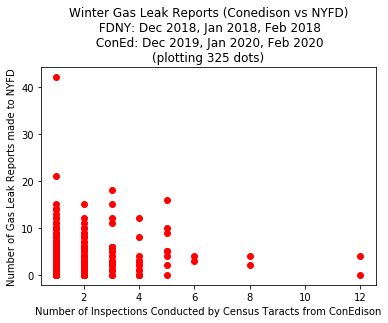

In [18]:
################################################## PLOT
conEd_WinterList = seasonalDF.Winter_ReportCount_ConEd.values
nyfd_WinterList = seasonalDF.Winter_ReportCount_NYFD.values

print("------------------------ SHOWING THE SAME SCATTER PLOT ( not interactive ) ------------------------")
titleStr  = "Winter Gas Leak Reports (Conedison vs NYFD)\n FDNY: Dec 2018, Jan 2018, Feb 2018\n ConEd: Dec 2019, Jan 2020, Feb 2020\n"+"(plotting "+str(len(seasonalDF))+" dots)"
plt.scatter(conEd_WinterList, nyfd_WinterList, color='Red')
plt.xlabel('Number of Inspections Conducted by Census Taracts from ConEdison')
plt.ylabel('Number of Gas Leak Reports made to NYFD')
plt.title(titleStr)
plt.show()

In [17]:
print("------------------------ SHOWING THE SAME SCATTER PLOT ( interactive ) ------------------------")
titleStr  = "Winter Gas Leak Reports (Conedison vs NYFD) (plotting "+str(len(seasonalDF))+" dots)"
fig = px.scatter(seasonalDF, x="Winter_ReportCount_ConEd", y="Winter_ReportCount_NYFD", color="CountyName", hover_data=['Geoid', "CensusTract", "CountyName" ])
fig.update_layout(title=titleStr)
fig.show() 

------------------------ SHOWING THE SAME SCATTER PLOT ( interactive ) ------------------------
